In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('simba customer sales data.csv')
df.head()

,n_distributor_id,dist_name,customer_code,dt,trip_time,dispatches,orders,order_value
0,2,Simba,1001,2023-05-15,evng,1,3,3417.84
1,2,Simba,1001,2023-05-17,evng,1,3,2875.13
2,2,Simba,1001,2023-05-20,evng,1,1,176.30
3,2,Simba,1001,2023-05-21,morning,1,1,962.54
4,2,Simba,1001,2023-05-23,morning,1,2,2632.77


In [29]:
def assign_shift(x):
    if x['diff'] > 0.2:
        if x['mrng_per'] > x['evng_per']:
            return 'mrng'
        else:
            return 'evng'
    else:
        return 'both'

In [129]:
shift_check = df.groupby(by=['customer_code', 'trip_time'])['dispatches'].sum().reset_index()
shift_check = shift_check.pivot_table(columns='trip_time', index='customer_code')
shift_check.columns = [col[1] for col in shift_check.columns]
shift_check.fillna(0, inplace=True)
shift_check['total'] = shift_check['evng'] + shift_check['morning']
shift_check['mrng_per'] = shift_check['morning']/shift_check['total']
shift_check['evng_per'] = shift_check['evng']/shift_check['total']
shift_check['diff'] = (shift_check['mrng_per'] - shift_check['evng_per']).abs()
shift_check['new_shift'] = shift_check.apply(assign_shift, axis=1)
shift_check.reset_index(inplace=True)
shift_check = shift_check.loc[:, ['customer_code', 'new_shift']]
shift_check

,customer_code,new_shift
0,1001,evng
1,1002,evng
2,1004,both
3,1007,both
4,1008,both
...,...,...
7211,24181,evng
7212,24182,mrng
7213,24184,mrng
7214,24188,evng


In [32]:
shift_check.groupby('new_shift')['total'].count()/shift_check['total'].count()

new_shift
both    0.175721
evng    0.417406
mrng    0.406874
Name: total, dtype: float64

In [93]:
daily_dispatches = df.pivot_table(index='customer_code', columns='dt', values='dispatches', aggfunc=np.sum)
daily_dispatches.fillna(0, inplace=True)
daily_dispatches

dt,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,...,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,2023-09-11
customer_code,,,,,,,,,,,,,,,,,,,,,
1001,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1002,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,2.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0
1004,3.0,4.0,3.0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,...,2.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,1.0
1007,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,2.0,1.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0
1008,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [100]:
avg_daily_dispatches = daily_dispatches.sum(axis=1)/max(daily_dispatches.count(axis=1))
avg_daily_dispatches = avg_daily_dispatches.reset_index()
avg_daily_dispatches.rename(columns={0:'daily_dispatch'}, inplace=True)
avg_daily_dispatches['dispatch_weight'] = avg_daily_dispatches['daily_dispatch']/avg_daily_dispatches['daily_dispatch'].sum()
avg_daily_dispatches = avg_daily_dispatches.loc[:, ['customer_code', 'dispatch_weight']]
avg_daily_dispatches.sort_values('dispatch_weight', ascending=False)

,customer_code,dispatch_weight
1540,4528,0.001267
237,1485,0.001145
5593,21447,0.001076
917,2833,0.001074
2266,6300,0.001002
...,...,...
2026,5681,0.000003
259,1525,0.000003
4508,18893,0.000003
2037,5697,0.000003


In [101]:
avg_daily_dispatches#['daily_dispatch'].sum()

,customer_code,dispatch_weight
0,1001,0.000133
1,1002,0.000214
2,1004,0.000510
3,1007,0.000487
4,1008,0.000168
...,...,...
7211,24181,0.000003
7212,24182,0.000003
7213,24184,0.000005
7214,24188,0.000003


In [102]:
order_value = df.pivot_table(index='customer_code', columns='dt', values='order_value', aggfunc=np.sum)
order_value.fillna(0, inplace=True)
order_value

dt,2023-05-15,2023-05-16,2023-05-17,2023-05-18,2023-05-19,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,...,2023-09-02,2023-09-03,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,2023-09-11
customer_code,,,,,,,,,,,,,,,,,,,,,
1001,3417.84,0.00,2875.13,0.00,0.00,176.30,962.54,0.00,2632.77,1148.72,...,0.00,2069.40,1535.16,943.07,0.00,0.00,1456.62,0.00,781.27,0.00
1002,0.00,1746.58,0.00,0.00,0.00,0.00,1087.05,949.24,0.00,1174.62,...,3843.77,0.00,0.00,2940.00,2097.93,2807.98,2437.29,3799.56,0.00,0.00
1004,2387.36,11560.02,9290.48,2182.06,5557.05,0.00,10250.44,5866.20,16978.38,5805.66,...,3491.32,0.00,0.00,0.00,13821.07,15824.60,14633.48,6001.93,4610.51,952.70
1007,4789.13,1138.56,1902.80,1271.24,2781.54,1188.59,0.00,919.02,2619.82,530.59,...,1233.94,1926.72,805.75,1753.15,299.71,1312.61,581.27,7624.07,917.98,2339.29
1008,0.00,5678.92,0.00,0.00,544.23,0.00,0.00,562.34,0.00,0.00,...,0.00,3069.77,0.00,0.00,767.46,0.00,0.00,0.00,3551.73,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24181,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2928.80,0.00,0.00
24182,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1590.00,0.00,0.00
24184,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36487.49


In [121]:
daily_order_value = order_value.sum(axis=1)/max(order_value.count(axis=1))
daily_order_value = daily_order_value.reset_index()
daily_order_value.rename(columns={0:'order_value'}, inplace=True)
daily_order_value['order_value_weight'] = daily_order_value['order_value']/daily_order_value['order_value'].sum()
daily_order_value = daily_order_value.loc[:, ['customer_code', 'order_value_weight']]
daily_order_value

,customer_code,order_value_weight
0,1001,0.000051
1,1002,0.000102
2,1004,0.000648
3,1007,0.000155
4,1008,0.000059
...,...,...
7211,24181,0.000002
7212,24182,0.000001
7213,24184,0.000027
7214,24188,0.000134


In [123]:
max(order_value.count(axis=1))

120

In [124]:
final_weights = avg_daily_dispatches.merge(daily_order_value, on='customer_code')
final_weights['final_weights'] = final_weights['dispatch_weight'] * final_weights['order_value_weight']
final_weights['final_weights'] = final_weights['final_weights']/final_weights['final_weights'].sum()
final_weights

,customer_code,dispatch_weight,order_value_weight,final_weights
0,1001,0.000133,0.000051,1.896295e-05
1,1002,0.000214,0.000102,6.127644e-05
2,1004,0.000510,0.000648,9.253850e-04
3,1007,0.000487,0.000155,2.111634e-04
4,1008,0.000168,0.000059,2.777103e-05
...,...,...,...,...
7211,24181,0.000003,0.000002,1.521262e-08
7212,24182,0.000003,0.000001,8.258696e-09
7213,24184,0.000005,0.000027,3.790429e-07
7214,24188,0.000003,0.000134,9.557233e-07


In [141]:
customer_profile = final_weights.merge(shift_check, on='customer_code')
customer_profile = customer_profile.sort_values(by=['final_weights'], ascending=False)
customer_profile.to_csv('customer_profile.csv')
customer_profile

,customer_code,dispatch_weight,order_value_weight,final_weights,new_shift
917,2833,0.001074,0.009670,0.029067,evng
1540,4528,0.001267,0.005701,0.020230,both
5593,21447,0.001076,0.006182,0.018627,evng
3166,12124,0.000763,0.007330,0.015648,evng
2266,6300,0.001002,0.003872,0.010863,evng
...,...,...,...,...,...
10,1019,0.000005,0.000000,0.000000,evng
15,1028,0.000003,0.000000,0.000000,evng
12,1021,0.000010,0.000000,0.000000,evng
6023,22330,0.000003,0.000000,0.000000,mrng


<Axes: xlabel='new_shift', ylabel='final_weights'>

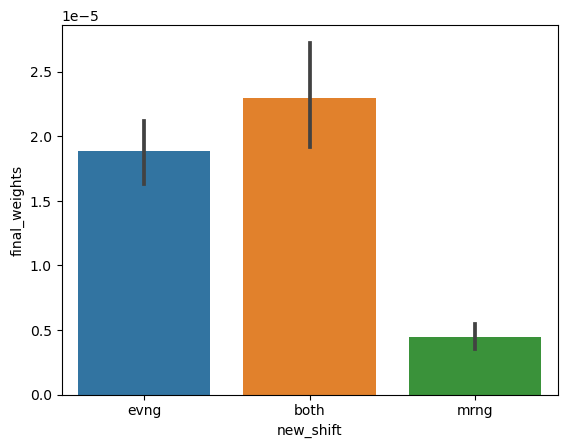

In [145]:
sns.barplot(data=customer_profile, x='new_shift', y='final_weights', estimator='median')